# **Example 02**
In this example, we will construct a neural network to **recognize handwritten digits**. The goal of this neural network will be to **classify** images of handwritten digits into 10 different **classes** (0 through 9).

First, we import the `TensorFlow` and `numpy` libraries.

In [ ]:
import tensorflow as tf
import numpy as np

Next, we load the MNIST dataset, which has images of handwritten digits (from 0 to 9).

In [ ]:
data = tf.keras.datasets.mnist

The images in the MNIST dataset are divided into two sets: a **training set** of images that we will use to train the neural network (`x_train`, `y_train`) and a **test set** of previously unseen images that we will use to evaluate the performance of the neural network (`x_test`, `y_test`).

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()

Let's explore the training set and the test set to get a better understanding of this data. **How many images are in the training set? How many images are in the test set? What is the size of each of these images?**

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Let's also print the first image in the training set and its corresponding **class label** to see what it looks like. **What digit is in this image?**

In [ ]:
import matplotlib.pyplot as plt
print(y_train[-1]) # class label
print(x_train[-1]) # image
#plt.imshow(x_train[-1]) # visualization of image

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 

**Try changing the index of `x_train` and `y_train` to print other images. What is the digit in the second image? What is the digit in the third image? What is the digit in the last image?**

Notice that each image in `x_train` is represented by a 28x28 matrix filled with values between 0 and 255. **What do these values represent?**

When we are training a neural network, it's easier if all the values are between 0 and 1, so we **normalize** the values in `x_train` and `x_test`.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Let's now design our neural network with a sequence of **layers**. For each layer, we specify the number of **neurons** and an **activation function**.

First, we have the **input** (**Flatten**) layer, which "flattens" (i.e., reshapes) the data from a 3D array to a 2D array.

We follow this with a **hidden** (**Dense**) layer. This layer has 16 neurons and `relu` as the activation function.

Finally, we have the **output** (**Dense**) layer. This layer has 10 neurons and `softmax` as the activation function. Notice that the number of neurons in this last layer should match the **number of classes** in the data.



In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
  tf.keras.layers.Dense(16, activation=tf.nn.relu), # hidden layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


We compile our neural network by specifying the loss function (`sparse_categorical_crossentropy`) and the optimization algorithm (`adam`), as well as a **metric** to evaluate the performance of the neural network. In this case, we use **accuracy** (that is, the fraction of images correctly classified) as the evaluation metric.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We then train our neural network to fit the training data.

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2695 - accuracy: 0.2760
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5261 - accuracy: 0.3950
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3233 - accuracy: 0.4422
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2430 - accuracy: 0.4682
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1622 - accuracy: 0.5252


Once it's done training, notice the accuracy at the end of the final epoch. It should be around 95%, which means that 95% of the images in the training set were classified correctly.

**But how well does our neural network do with unseen images?** To find out, we try to classify the images in the test set.

In [ ]:
predictions = model.predict(x_test)
print(predictions[1]) # output
print(np.around(predictions[1], 1)) # rounded output

[7.2012945e-06 8.7736851e-05 9.7999328e-01 3.0937110e-04 4.2690165e-13
 4.2470690e-04 1.9161694e-02 9.4015193e-13 1.5969992e-05 1.9699065e-09]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


2


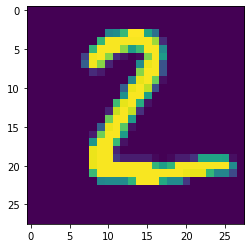

In [ ]:
print(y_test[1]) # class label
plt.imshow(x_test[1]) # visualization of image

Notice that the output for each image is a list of numbers. **What do these numbers represent? What is the predicted class label for the first image in the test set? Was this image classified correctly?**

We can also evaluate the performance of our neural network on the test set.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1957 - accuracy: 0.9434


[0.19568932056427002, 0.9434000253677368]

The accuracy on the test set should be around 94%, which means that 94% of the images in the test set were classified correctly. This is still very good, but it's lower than the accuracy on the training set, which is expected. **But can we do any better?**

## **Activity**
In this activity, you have to experiment with the **structure** of the neural network that we just built by changing the number of neurons in the hidden layer. Your goal is to **maximize the accuracy on the test set**, while **minimizing the number of neurons**.

Create a neural network with the same number of layers and activation functions as above, but with different numbers of neurons in the hidden layer. **Try using 32, 64, 128, and 256 neurons**.

In [ ]:
model = tf.keras.models.Sequential([
  ...
])
model.summary()

Compile the neural network. Use the same loss function, optimization algorithm, and metric as above.

In [ ]:
model.compile(...)

Train the neural network for **5** epochs.

In [ ]:
model.fit(...)

Evaluate the performance of the neural network on the test set.

In [ ]:
model.evaluate(...)

**What is the accuracy of the neural network on the test set using 16, 32, 64, 128, and 256 neurons? How does the time that takes to train the neural network change as we increase the number of neurons? How many neurons would you ultimately choose for this neural network?**

**Answer:** ...